<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Tidymodels_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the tutorial as given in:
https://juliasilge.com/blog/lasso-the-office/

In [2]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [19]:
install.packages("schrute")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [32]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [36]:
install.packages("vip")
install.packages("doParallel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(schrute)

In [6]:
library(tidymodels)

In [33]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [37]:
library(doParallel)

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel



In [38]:
library(vip)


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




In [9]:
library(tidyverse)

In [26]:
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Explore the data

Our modeling goal here is to predict the IMDB ratings for episodes of The Office based on the other characteristics of the episodes in the #TidyTuesday dataset. There are two datasets, one with the ratings and one with information like director, writer, and which character spoke which line. The episode numbers and titles are not consistent between them, so we can use regular expressions to do a better job of matching the datasets up for joining.

In [21]:
ratings_raw <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv")

remove_regex <- "[:punct:]|[:digit:]|parts |part |the |and"

office_ratings <- ratings_raw %>%
  transmute(
    episode_name = str_to_lower(title),
    episode_name = str_remove_all(episode_name, remove_regex),
    episode_name = str_trim(episode_name),
    imdb_rating
  )

office_info <- schrute::theoffice %>%
  mutate(
    season = as.numeric(season),
    episode = as.numeric(episode),
    episode_name = str_to_lower(episode_name),
    episode_name = str_remove_all(episode_name, remove_regex),
    episode_name = str_trim(episode_name)
  ) %>%
  select(season, episode, episode_name, director, writer, character)

office_info

Rows: 188 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): title
dbl  (4): season, episode, imdb_rating, total_votes
date (1): air_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


season,episode,episode_name,director,writer,character
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam
1,1,pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael


We are going to use several different kinds of features for modeling. First, let’s find out how many times characters speak per episode.

In [22]:
characters <- office_info %>%
  count(episode_name, character) %>%
  add_count(character, wt = n, name = "character_count") %>%
  filter(character_count > 800) %>%
  select(-character_count) %>%
  pivot_wider(
    names_from = character,
    values_from = n,
    values_fill = list(n = 0)
  )

characters

episode_name,Andy,Angela,Darryl,Dwight,Jim,Kelly,Kevin,Michael,Oscar,Pam,Phyllis,Ryan,Toby,Erin,Jan
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
a benihana christmas,28,37,3,61,44,5,14,108,1,57,12,8,8,0,0
aarm,44,39,30,87,89,0,30,0,28,34,7,0,0,22,0
after hours,20,11,14,60,55,8,4,0,10,15,4,20,0,19,0
alliance,0,7,0,47,49,0,3,68,14,22,5,4,4,0,0
angry y,53,7,5,16,19,13,9,0,7,29,10,30,1,24,0
baby shower,13,13,9,35,27,2,4,79,3,25,7,0,0,0,38
back from vacation,3,4,6,22,25,0,5,70,0,33,2,0,7,0,12
banker,1,2,0,17,0,0,2,44,0,5,0,1,18,0,0
basketball,0,3,15,25,21,0,1,104,2,14,4,8,0,0,0


Next, let’s find which directors and writers are involved in each episode. I’m choosing here to combine this into one category in modeling, for a simpler model, since these are often the same individuals.

In [23]:
creators <- office_info %>%
  distinct(episode_name, director, writer) %>%
  pivot_longer(director:writer, names_to = "role", values_to = "person") %>%
  separate_rows(person, sep = ";") %>%
  add_count(person) %>%
  filter(n > 10) %>%
  distinct(episode_name, person) %>%
  mutate(person_value = 1) %>%
  pivot_wider(
    names_from = person,
    values_from = person_value,
    values_fill = list(person_value = 0)
  )

creators

episode_name,Ken Kwapis,Greg Daniels,B.J. Novak,Paul Lieberstein,Mindy Kaling,Paul Feig,Gene Stupnitsky,Lee Eisenberg,Jennifer Celotta,Randall Einhorn,Brent Forrester,Jeffrey Blitz,Justin Spitzer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pilot,1,1,0,0,0,0,0,0,0,0,0,0,0
diversity day,1,0,1,0,0,0,0,0,0,0,0,0,0
health care,0,0,0,1,0,0,0,0,0,0,0,0,0
basketball,0,1,0,0,0,0,0,0,0,0,0,0,0
hot girl,0,0,0,0,1,0,0,0,0,0,0,0,0
dundies,0,1,0,0,1,0,0,0,0,0,0,0,0
sexual harassment,1,0,1,0,0,0,0,0,0,0,0,0,0
office olympics,0,0,0,0,0,1,0,0,0,0,0,0,0
fire,1,0,1,0,0,0,0,0,0,0,0,0,0


Next, let’s find the season and episode number for each episode, and then finally let’s put it all together into one dataset for modeling.

In [27]:
office <- office_info %>%
  distinct(season, episode, episode_name) %>%
  inner_join(characters) %>%
  inner_join(creators) %>%
  inner_join(office_ratings %>%
    select(episode_name, imdb_rating)) %>%
  janitor::clean_names()

office

Joining with `by = join_by(episode_name)`
Joining with `by = join_by(episode_name)`
Joining with `by = join_by(episode_name)`
Warning message in inner_join(., office_ratings %>% select(episode_name, imdb_rating)):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 71 of `x` matches multiple rows in `y`.
ℹ Row 79 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


season,episode,episode_name,andy,angela,darryl,dwight,jim,kelly,kevin,⋯,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer,imdb_rating
<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,pilot,0,1,0,29,36,0,1,⋯,0,0,0,0,0,0,0,0,0,7.6
1,2,diversity day,0,4,0,17,25,2,8,⋯,0,0,0,0,0,0,0,0,0,8.3
1,3,health care,0,5,0,62,42,0,6,⋯,0,0,0,0,0,0,0,0,0,7.9
1,5,basketball,0,3,15,25,21,0,1,⋯,0,0,0,0,0,0,0,0,0,8.4
1,6,hot girl,0,3,0,28,55,0,5,⋯,1,0,0,0,0,0,0,0,0,7.8
2,1,dundies,0,1,1,32,32,7,1,⋯,1,0,0,0,0,0,0,0,0,8.7
2,2,sexual harassment,0,2,9,11,16,0,6,⋯,0,0,0,0,0,0,0,0,0,8.2
2,3,office olympics,0,6,0,55,55,0,9,⋯,0,1,0,0,0,0,0,0,0,8.4
2,4,fire,0,17,0,65,51,4,5,⋯,0,0,0,0,0,0,0,0,0,8.4


There are lots of great examples of EDA on Twitter; I especially encourage you to check out the screencast of my coauthor Dave, which is similar in spirit to the modeling I am showing here and includes more EDA. Just for kicks, let’s show one graph.

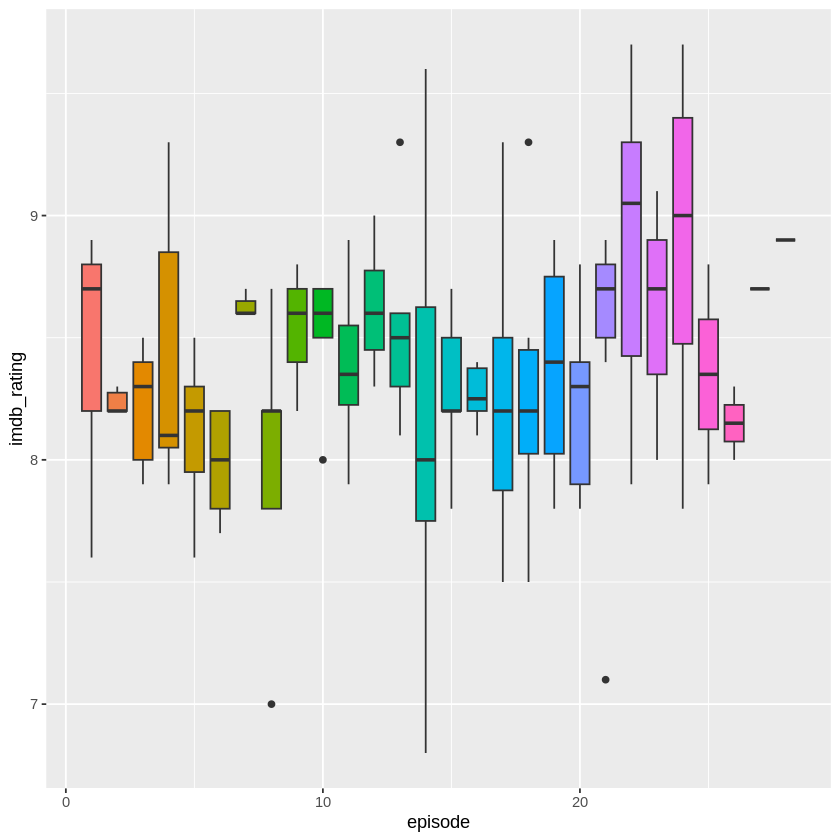

In [28]:
office %>%
  ggplot(aes(episode, imdb_rating, fill = as.factor(episode))) +
  geom_boxplot(show.legend = FALSE)

Ratings are higher for episodes later in the season. What else is associated with higher ratings? Let’s use lasso regression to find out! 🚀

# Train a model

We can start by loading the tidymodels metapackage, and splitting our data into training and testing sets.

In [29]:
office_split <- initial_split(office, strata = season)
office_train <- training(office_split)
office_test <- testing(office_split)

Then, we build a recipe for data preprocessing.

- First, we must tell the recipe() what our model is going to be (using a formula here) and what our training data is.
- Next, we update the role for episode_name, since this is a variable we might like to keep around for convenience as an identifier for rows but is not a predictor or outcome.
- Next, we remove any numeric variables that have zero variance.
- As a last step, we normalize (center and scale) the numeric variables. We need to do this because it’s important for lasso regularization.

The object office_rec is a recipe that has not been trained on data yet (for example, the centered and scaling has not been calculated) and office_prep is an object that has been trained on data. The reason I use strings_as_factors = FALSE here is that my ID column episode_name is of type character (as opposed to, say, integers).

In [30]:
office_rec <- recipe(imdb_rating ~ ., data = office_train) %>%
  update_role(episode_name, new_role = "ID") %>%
  step_zv(all_numeric(), -all_outcomes()) %>%
  step_normalize(all_numeric(), -all_outcomes())

office_prep <- office_rec %>%
  prep(strings_as_factors = FALSE)

Now it’s time to specify and then fit our models. Here I set up one model specification for lasso regression; I picked a value for penalty (sort of randomly) and I set mixture = 1 for lasso. I am using a workflow() in this example for convenience; these are objects that can help you manage modeling pipelines more easily, with pieces that fit together like Lego blocks. You can fit() a workflow, much like you can fit a model, and then you can pull out the fit object and tidy() it!

In [39]:
lasso_spec <- linear_reg(penalty = 0.1, mixture = 1) %>%
  set_engine("glmnet")

wf <- workflow() %>%
  add_recipe(office_rec)

lasso_fit <- wf %>%
  add_model(lasso_spec) %>%
  fit(data = office_train)

lasso_fit %>%
  pull_workflow_fit() %>%
  tidy()

Warning message:
“`pull_workflow_fit()` was deprecated in workflows 0.2.3.
ℹ Please use `extract_fit_parsnip()` instead.”


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),8.33500000,0.1
season,0.00000000,0.1
episode,0.00000000,0.1
andy,0.00000000,0.1
angela,0.00000000,0.1
darryl,0.00000000,0.1
dwight,0.00000000,0.1
jim,0.06258487,0.1
kelly,0.00000000,0.1


If you have used glmnet before, this is the familiar output where we can see (here, for the most regularized examples) what contributes to higher IMDB ratings.

# Tune LASSO parameters

So we fit one lasso model, but how do we know the right regularization parameter penalty? We can figure that out using resampling and tuning the model. Let’s build a set of bootstrap resamples, and set penalty = tune() instead of to a single value. We can use a function penalty() to set up an appropriate grid for this kind of regularization model.

In [40]:
set.seed(1234)
office_boot <- bootstraps(office_train, strata = season)

tune_spec <- linear_reg(penalty = tune(), mixture = 1) %>%
  set_engine("glmnet")

lambda_grid <- grid_regular(penalty(), levels = 50)

Now it’s time to tune the grid, using our workflow object.

In [41]:
doParallel::registerDoParallel()

set.seed(2020)
lasso_grid <- tune_grid(
  wf %>% add_model(tune_spec),
  resamples = office_boot,
  grid = lambda_grid
)

What results did we get?

In [42]:
lasso_grid %>%
  collect_metrics()

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1.000000e-10,rmse,standard,0.5980180,25,0.01656739,Preprocessor1_Model01
1.000000e-10,rsq,standard,0.1230645,25,0.01715291,Preprocessor1_Model01
1.599859e-10,rmse,standard,0.5980180,25,0.01656739,Preprocessor1_Model02
1.599859e-10,rsq,standard,0.1230645,25,0.01715291,Preprocessor1_Model02
2.559548e-10,rmse,standard,0.5980180,25,0.01656739,Preprocessor1_Model03
2.559548e-10,rsq,standard,0.1230645,25,0.01715291,Preprocessor1_Model03
4.094915e-10,rmse,standard,0.5980180,25,0.01656739,Preprocessor1_Model04
4.094915e-10,rsq,standard,0.1230645,25,0.01715291,Preprocessor1_Model04
6.551286e-10,rmse,standard,0.5980180,25,0.01656739,Preprocessor1_Model05


That’s nice, but I would rather see a visualization of performance with the regularization parameter.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


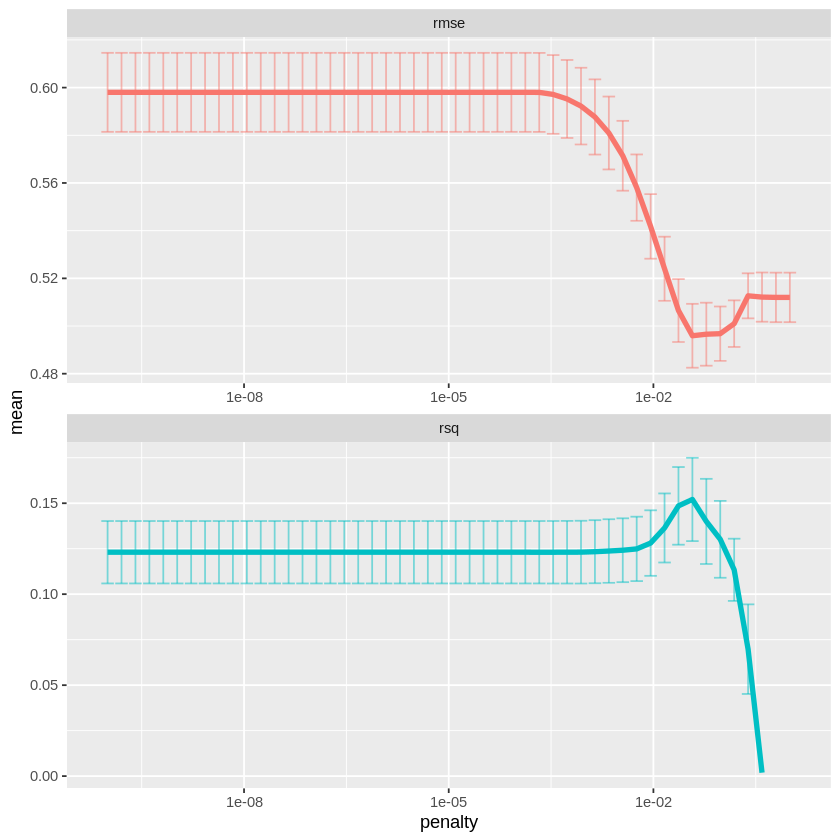

In [43]:
lasso_grid %>%
  collect_metrics() %>%
  ggplot(aes(penalty, mean, color = .metric)) +
  geom_errorbar(aes(
    ymin = mean - std_err,
    ymax = mean + std_err
  ),
  alpha = 0.5
  ) +
  geom_line(size = 1.5) +
  facet_wrap(~.metric, scales = "free", nrow = 2) +
  scale_x_log10() +
  theme(legend.position = "none")

This is a great way to see that regularization helps this modeling a lot. We have a couple of options for choosing our final parameter, such as select_by_pct_loss() or select_by_one_std_err(), but for now let’s stick with just picking the lowest RMSE. After we have that parameter, we can finalize our workflow, i.e. update it with this value.

In [44]:
lowest_rmse <- lasso_grid %>%
  select_best("rmse", maximize = FALSE)

final_lasso <- finalize_workflow(
  wf %>% add_model(tune_spec),
  lowest_rmse
)

Warning message:
“The `maximize` argument is no longer needed. This value was ignored.”


We can then fit this finalized workflow on our training data. While we’re at it, let’s see what the most important variables are using the vip package.

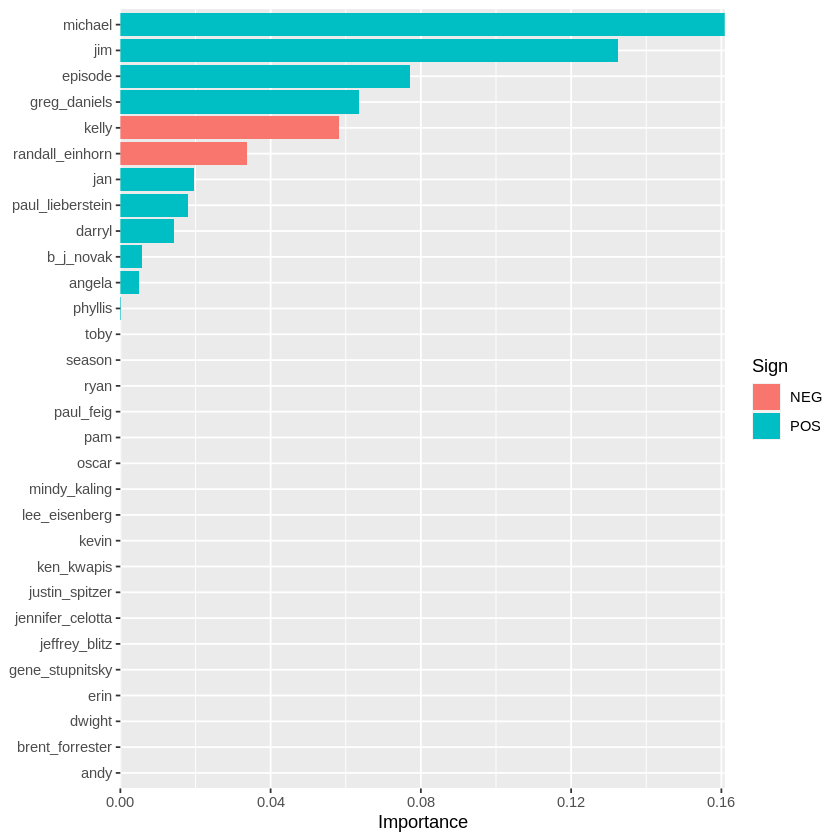

In [45]:
final_lasso %>%
  fit(office_train) %>%
  pull_workflow_fit() %>%
  vi(lambda = lowest_rmse$penalty) %>%
  mutate(
    Importance = abs(Importance),
    Variable = fct_reorder(Variable, Importance)
  ) %>%
  ggplot(aes(x = Importance, y = Variable, fill = Sign)) +
  geom_col() +
  scale_x_continuous(expand = c(0, 0)) +
  labs(y = NULL)

And then, finally, let’s return to our test data. The tune package has a function last_fit() which is nice for situations when you have tuned and finalized a model or workflow and want to fit it one last time on your training data and evaluate it on your testing data. You only have to pass this function your finalized model/workflow and your split.

In [46]:
last_fit(
  final_lasso,
  office_split
) %>%
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,0.4235910,Preprocessor1_Model1
rsq,standard,0.2699494,Preprocessor1_Model1


For an example of tuning random forest, please see: https://juliasilge.com/blog/sf-trees-random-tuning/